In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from keras import layers, models


In [3]:
import pathlib
import glob
import PIL
import cv2

In [4]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Conv2D, GlobalMaxPooling2D, MaxPooling2D, Dense, Input, Flatten, Dropout, BatchNormalization
from keras.models import Model, load_model
import tensorflow as tf
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [5]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/Project_CECS456/natural_images"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir"

In [6]:
import os
# Get list of all filenames in the data directory
all_filenames = os.listdir(data_dir)

# Split the data into train and remaining (validation + test)
train_filenames, test_filenames = train_test_split(all_filenames, test_size=0.05, random_state=2)



In [7]:
data = pathlib.Path(data_dir)
test_data = pathlib.Path(test_dir)

In [8]:
data


PosixPath('/content/drive/MyDrive/Colab Notebooks/Project_CECS456/natural_images')

In [9]:
test_data

PosixPath('/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir')

In [10]:
len(list(data.glob('*/*.jpg')))



6450

In [11]:
test_samples = len(list(test_data.glob('*/*.jpg')))

In [12]:
test_samples

271

In [ ]:
airplane = list(data.glob('airplane/*'))
airplane[:2]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Project_CECS456/natural_images/airplane/airplane_0000.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Project_CECS456/natural_images/airplane/airplane_0006.jpg')]

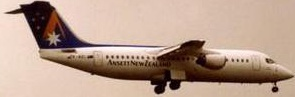

In [ ]:
PIL.Image.open(str(airplane[1]))

In [13]:
image_dict = {
    'airplane': list(data.glob('airplane/*')),
    'car': list(data.glob('car/*')),
    'cat': list(data.glob('cat/*')),
    'dog': list(data.glob('dog/*')),
    'flower': list(data.glob('flower/*')),
    'fruit': list(data.glob('fruit/*')),
    'motorbike': list(data.glob('motorbike/*')),
    'person': list(data.glob('person/*'))
}

In [14]:
image_label = {
    'airplane',
    'car',
    'cat',
    'dog',
    'flower',
    'fruit',
    'motorbike',
    'person'
}

In [ ]:
img = cv2.imread(str(image_dict['airplane'][1]))

In [ ]:
img.shape

(97, 295, 3)

In [15]:
import random
from pathlib import Path

# Assuming 'data' is a single PosixPath object representing the directory

# Get all file paths (including hidden files)
file_paths = list(Path(data).rglob('*'))


# Shuffle the list of file paths
random.shuffle(file_paths)

# Step 2: Determine sizes
total_samples = len(file_paths)
train_size = int(0.9 * total_samples)
val_size = int(0.05 * total_samples)
#already moved test files into another folder for testing dataset 5% of total_samples

# Step 3: Split the dataset
train_data = file_paths[:train_size]
val_data = file_paths[:val_size]


# Verify sizes
print("Train size:", len(train_data))
print("Validation size:", len(val_data))
print("Test size:", test_samples)



Train size: 5812
Validation size: 322
Test size: 271


In [ ]:
import os
import shutil

# Assuming val_data contains the paths or filenames of validation data
# and val_dir is the directory where you want to store validation data

BATCH_SIZE = 64
IMAGE_SIZE=(192,192)
IMAGE_SHAPE=(192,192,3)

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   validation_split=0.05)

# # Create the directory if it doesn't exist
# if not os.path.exists('val_dir'):
#     os.makedirs('val_dir')

# # Move validation data files to the validation directory
# for file in val_data:
#     # If file contains full paths, you may need to extract the filename
#     # and combine it with the target directory
#     shutil.move(file, 'val_dir')

# Now val_dir contains the validation data
val_dir="/content/val_dir"
# Use val_dir in ImageDataGenerator for validation data
validation_generator = train_datagen.flow_from_directory(
        val_dir,  # directory with validation images
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        shuffle=False,
        class_mode='categorical',
        subset='validation'
)




Found 0 images belonging to 1 classes.


In [ ]:
# # Create the directory if it doesn't exist
# if not os.path.exists('test_dir'):
#     os.makedirs('test_dir')

# # Move test data files to the test directory
# for file in test_data:
#     # If file contains full paths, you may need to extract the filename
#     # and combine it with the target directory
#     shutil.move(file, 'test_dir')

In [ ]:
# # Create the directory if it doesn't exist
# if not os.path.exists('val_dir/test_dir/flower'):
#     os.makedirs('test_dir')

# # Move test data files to the test directory
# for file in test_data:
#     # If file contains full paths, you may need to extract the filename
#     # and combine it with the target directory
#     shutil.move(file, 'test_dir')

In [16]:
from pathlib import Path
BATCH_SIZE = 32
IMAGE_SIZE=(180,180)
IMAGE_SHAPE=(180,180,3)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   validation_split=0.05) # set validation split


train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size = IMAGE_SIZE,
    shuffle=True,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training') # set as training data

# Use val_dir in ImageDataGenerator for validation data
validation_generator = train_datagen.flow_from_directory(
        data_dir,  # directory with validation images
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        shuffle=False,
        class_mode='categorical',
        subset='validation'
)

# # test generator
# test_generator = train_datagen.flow_from_directory(
#     data_dir,
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     shuffle=False,
#     class_mode='categorical',
#     subset='validation'
# )


Found 6133 images belonging to 8 classes.
Found 317 images belonging to 8 classes.


In [17]:
resnet = ResNet50(include_top=False, weights='imagenet')
for layer in resnet.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [18]:
IMAGE_SHAPE=(180,180,3)

def classification_model():
    image_input = Input(shape=IMAGE_SHAPE)
    # Base feature extraction
    x = resnet(image_input)
    #x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.15)(x)
    x = BatchNormalization(axis=1)(x)

    x = Dense(512, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(axis=1)(x)

    x = Flatten()(x)
    pred = Dense(8, activation='softmax')(x)
    return Model(inputs = image_input, outputs = pred)

In [21]:
model = classification_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 dense (Dense)               (None, 6, 6, 512)         1049088   
                                                                 
 dropout (Dropout)           (None, 6, 6, 512)         0         
                                                                 
 batch_normalization (Batch  (None, 6, 6, 512)         24        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 6, 6, 512)         262656

In [19]:
filepath= "/content/drive/MyDrive/Colab Notebooks/Project_CECS456/saved_models/model-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)
callbacks_list = [checkpoint]

In [22]:
EPOCHS = 20
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//BATCH_SIZE,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//BATCH_SIZE,
    epochs = EPOCHS,
    verbose=1,
    callbacks=callbacks_list)

Epoch 1/20
191/191 [==============================] - ETA: 0s - loss: 0.1577 - accuracy: 0.9705
Epoch 1: val_accuracy improved from -inf to 0.95833, saving model to /content/drive/MyDrive/Colab Notebooks/Project_CECS456/saved_models/model-01-0.9583.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


191/191 [==============================] - 1870s 10s/step - loss: 0.1577 - accuracy: 0.9705 - val_loss: 0.2031 - val_accuracy: 0.9583
Epoch 2/20
191/191 [==============================] - ETA: 0s - loss: 0.0481 - accuracy: 0.9907
Epoch 2: val_accuracy improved from 0.95833 to 0.97569, saving model to /content/drive/MyDrive/Colab Notebooks/Project_CECS456/saved_models/model-02-0.9757.h5
191/191 [==============================] - 81s 420ms/step - loss: 0.0481 - accuracy: 0.9907 - val_loss: 0.1130 - val_accuracy: 0.9757
Epoch 3/20
191/191 [==============================] - ETA: 0s - loss: 0.0623 - accuracy: 0.9921
Epoch 3: val_accuracy improved from 0.97569 to 0.98264, saving model to /content/drive/MyDrive/Colab Notebooks/Project_CECS456/saved_models/model-03-0.9826.h5
191/191 [==============================] - 82s 425ms/step - loss: 0.0623 - accuracy: 0.9921 - val_loss: 0.0643 - val_accuracy: 0.9826
Epoch 4/20
191/191 [==============================] - ETA: 0s - loss: 0.0543 - accuracy:

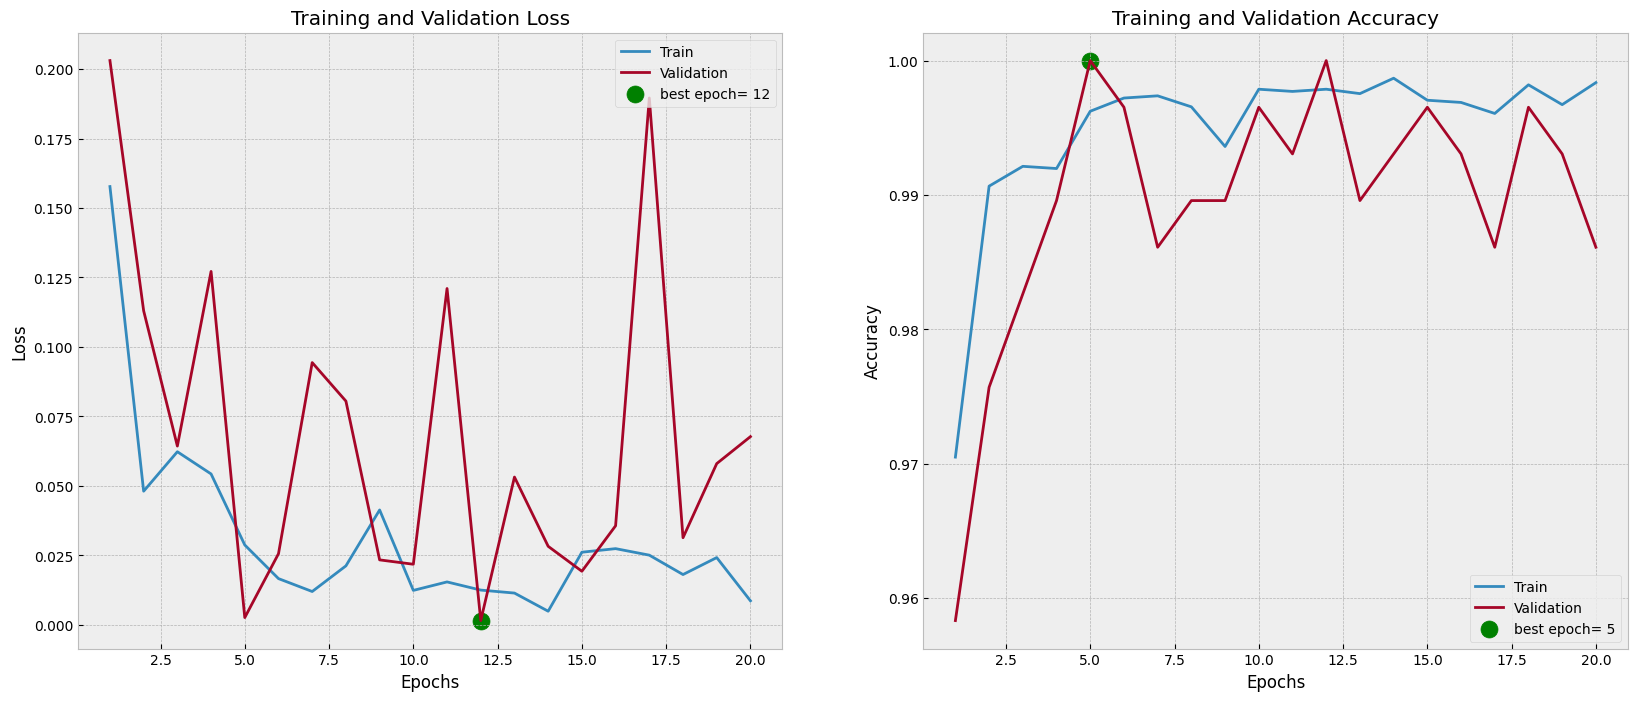

In [23]:
acc_train_curve = history.history['accuracy']
loss_train_curve = history.history['loss']
acc_val_curve = history.history['val_accuracy']
loss_val_curve = history.history['val_loss']
index_loss = np.argmin(loss_val_curve)
val_lowest = loss_val_curve[index_loss]
index_acc = np.argmax(acc_val_curve)
acc_highest = acc_val_curve[index_acc]
Epochs = [i+1 for i in range(len(acc_train_curve))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('bmh')
plt.subplot(1, 2, 1)
plt.plot(Epochs, loss_train_curve, label= 'Train')
plt.plot(Epochs, loss_val_curve, label= 'Validation')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'green', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.subplot(1, 2, 2)
plt.plot(Epochs, acc_train_curve, label= 'Train')
plt.plot(Epochs, acc_val_curve, label= 'Validation')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'green', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.tight_layout
plt.show()

In [24]:
#Confusion Matrix and Classification Report
validation_generator.reset
#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator, validation_generator.samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['airplane','car','cat','dog','flower','fruit','motorbike','person']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

10/10 [==============================] - 7s 603ms/step
Confusion Matrix
[[34  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0]
 [ 0  0 39  2  0  0  0  0]
 [ 0  0  0 33  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 46]]
Classification Report
              precision    recall  f1-score   support

    airplane       1.00      1.00      1.00        34
         car       1.00      1.00      1.00        46
         cat       1.00      0.95      0.97        41
         dog       0.94      1.00      0.97        33
      flower       1.00      1.00      1.00        40
       fruit       1.00      1.00      1.00        39
   motorbike       1.00      1.00      1.00        38
      person       1.00      1.00      1.00        46

    accuracy                           0.99       317
   macro avg       0.99      0.99      0.99       317
weighted avg       0.99      0.99      0.99       317



[Text(0, 0.5, 'airplane'),
 Text(0, 1.5, 'car'),
 Text(0, 2.5, 'cat'),
 Text(0, 3.5, 'dog'),
 Text(0, 4.5, 'flower'),
 Text(0, 5.5, 'fruit'),
 Text(0, 6.5, 'motorbike'),
 Text(0, 7.5, 'person')]

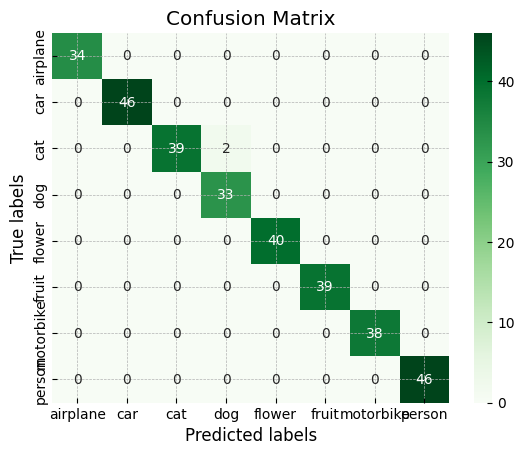

In [25]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(validation_generator.classes, y_pred), annot=True, ax = ax, fmt='g', cmap='Greens') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['airplane','car','cat','dog','flower','fruit','motorbike','person']); ax.yaxis.set_ticklabels(['airplane','car','cat','dog','flower','fruit','motorbike','person'])

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # No shuffling for test data
)

Found 271 images belonging to 8 classes.


In [27]:
from keras.models import load_model

# Load the best model
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/Project_CECS456/saved_models/model-05-1.0000.h5')

# Evaluate the model on the test dataset
test_loss, test_accuracy = best_model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

9/9 [==============================] - 75s 9s/step - loss: 7.7678 - accuracy: 0.0923
Test Loss: 7.7678303718566895
Test Accuracy: 0.09225092083215714


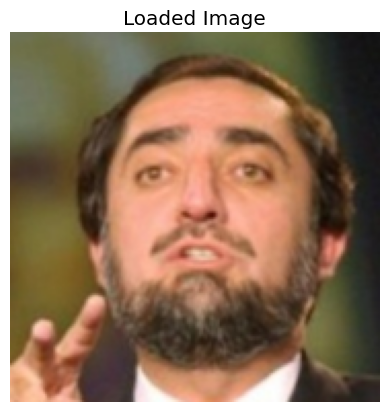

1/1 [==============================] - 2s 2s/step
Predicted Class Label: person


In [28]:
from PIL import Image

image_path = '/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir/person/person_0024.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((180, 180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Display the image
plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')  # Hide axes ticks
plt.show()

# Make predictions
predictions = best_model.predict(img_array)
class_labels = list(image_dict.keys())
score = tf.nn.softmax(predictions[0])

# Display prediction
predicted_class = class_labels[tf.argmax(score)]
print(f"Predicted Class Label: {predicted_class}")

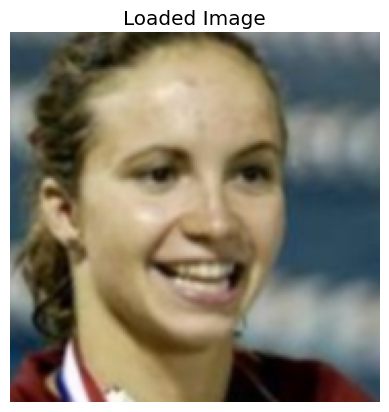

1/1 [==============================] - 0s 30ms/step
Predicted Class Label: person


In [29]:
from PIL import Image

image_path = '/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir/person/person_0954.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((180, 180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Display the image
plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')  # Hide axes ticks
plt.show()

# Make predictions
predictions = best_model.predict(img_array)
class_labels = list(image_dict.keys())
score = tf.nn.softmax(predictions[0])

# Display prediction
predicted_class = class_labels[tf.argmax(score)]
print(f"Predicted Class Label: {predicted_class}")

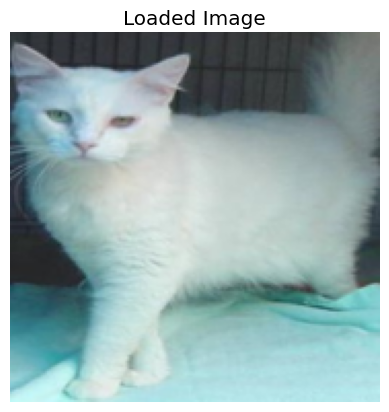

1/1 [==============================] - 0s 29ms/step
Predicted Class Label: cat


In [30]:
image_path = '/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir/cat/cat_0038.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((180, 180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Display the image
plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')  # Hide axes ticks
plt.show()

# Make predictions
predictions = best_model.predict(img_array)
class_labels = list(image_dict.keys())
score = tf.nn.softmax(predictions[0])

# Display prediction
predicted_class = class_labels[tf.argmax(score)]
print(f"Predicted Class Label: {predicted_class}")

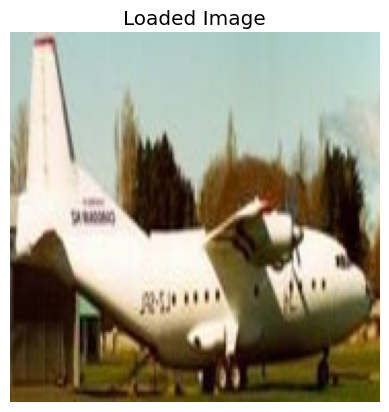

1/1 [==============================] - 0s 29ms/step
Predicted Class Label: airplane


In [31]:
image_path = '/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir/airplane/airplane_0003.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((180, 180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Display the image
plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')  # Hide axes ticks
plt.show()

# Make predictions
predictions = best_model.predict(img_array)
class_labels = list(image_dict.keys())
score = tf.nn.softmax(predictions[0])

# Display prediction
predicted_class = class_labels[tf.argmax(score)]
print(f"Predicted Class Label: {predicted_class}")

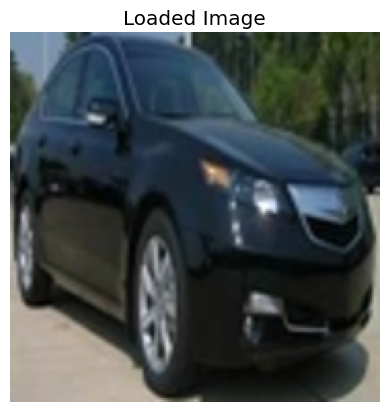

1/1 [==============================] - 0s 30ms/step
Predicted Class Label: car


In [32]:
image_path = '/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir/car/car_0049.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((180, 180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Display the image
plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')  # Hide axes ticks
plt.show()

# Make predictions
predictions = best_model.predict(img_array)
class_labels = list(image_dict.keys())
score = tf.nn.softmax(predictions[0])

# Display prediction
predicted_class = class_labels[tf.argmax(score)]
print(f"Predicted Class Label: {predicted_class}")

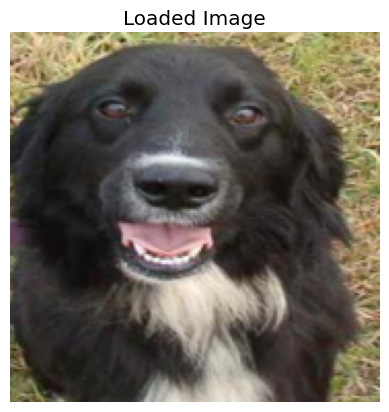

1/1 [==============================] - 0s 28ms/step
Predicted Class Label: dog


In [33]:
image_path = '/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir/dog/dog_0087.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((180, 180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Display the image
plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')  # Hide axes ticks
plt.show()

# Make predictions
predictions = best_model.predict(img_array)
class_labels = list(image_dict.keys())
score = tf.nn.softmax(predictions[0])

# Display prediction
predicted_class = class_labels[tf.argmax(score)]
print(f"Predicted Class Label: {predicted_class}")

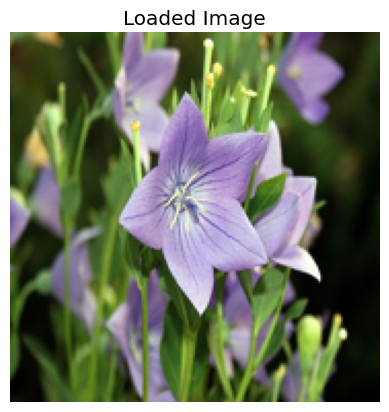

1/1 [==============================] - 0s 29ms/step
Predicted Class Label: flower


In [34]:
image_path = '/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir/flower/flower_0051.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((180, 180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Display the image
plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')  # Hide axes ticks
plt.show()

# Make predictions
predictions = best_model.predict(img_array)
class_labels = list(image_dict.keys())
score = tf.nn.softmax(predictions[0])

# Display prediction
predicted_class = class_labels[tf.argmax(score)]
print(f"Predicted Class Label: {predicted_class}")

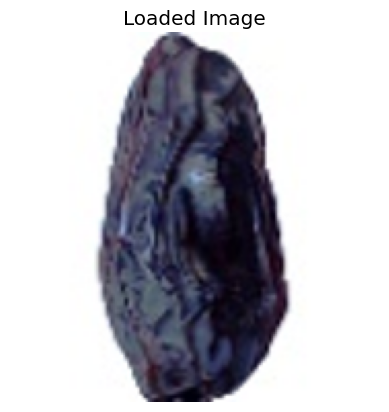

1/1 [==============================] - 0s 41ms/step
Predicted Class Label: fruit


In [35]:
image_path = '/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir/fruit/fruit_0021.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((180, 180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Display the image
plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')  # Hide axes ticks
plt.show()

# Make predictions
predictions = best_model.predict(img_array)
class_labels = list(image_dict.keys())
score = tf.nn.softmax(predictions[0])

# Display prediction
predicted_class = class_labels[tf.argmax(score)]
print(f"Predicted Class Label: {predicted_class}")

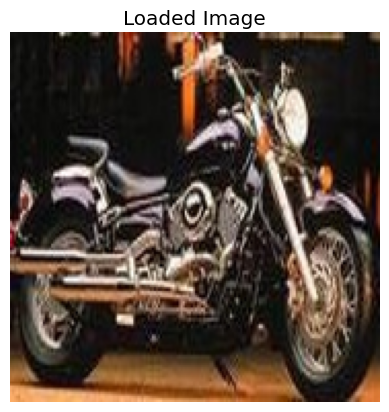

1/1 [==============================] - 0s 30ms/step
Predicted Class Label: motorbike


In [36]:
image_path = '/content/drive/MyDrive/Colab Notebooks/Project_CECS456/test_dir/motorbike/motorbike_0051.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((180, 180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Display the image
plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')  # Hide axes ticks
plt.show()

# Make predictions
predictions = best_model.predict(img_array)
class_labels = list(image_dict.keys())
score = tf.nn.softmax(predictions[0])

# Display prediction
predicted_class = class_labels[tf.argmax(score)]
print(f"Predicted Class Label: {predicted_class}")